# Control por variación de frecuencia del Motor Asincrónico

## Característica mecánica
Recordamos la ecuación de la característica mecánica del Motor Asincrónico

$$M={{3U_f^2r_2'} \over {\omega_s[(r_1+{r_2' \over s})^2+(x_1+x_2')^2}]s}$$

Veamos los datos de chapa para un motor ejemplo: MT-42-8.

In [2]:
Un = 380/3**0.5 # V de fase
Pn = 16    # Kw
Nn = 955   # rpm
la = 2.8   # Mc/Mn
pf = 0.77  # Factor de potencia
I1n = 37.6 # A
R1 = 0.33
X1 = 0.41
R2 = 0.099
X2 = 0.25
ke = 1.75  # R2' = ke^2 * R2
fn = 50    # Hz frecuencia de la red
p = 3      # pares de polos

In [3]:
import numpy as np

$\omega_0=1000$rpm porque la frecuencia de la red es 50Hz y calculamos su valor en rad/s:

In [4]:
w0 = 1000*np.pi/30
print(F"w0={w0:.0f}rad/s")

w0=105rad/s


Calculamos $r_2'=k_e^2r_2$ y  $x_2'=k_e^2x_2$

In [5]:
R2r = ke**2*R2
X2r = ke**2*X2
print(F"R2r={R2r:.2f}ohm")
print(F"X2r={X2r:.2f}ohm")

R2r=0.30ohm
X2r=0.77ohm


In [6]:
Mc = 3*Un**2/(2*w0*(R1+(R1**2+(X1+X2r)**2)**0.5))
Sc = R2r/(R1**2+(X1+X2r)**2)**0.5
print(F"Mc={Mc:.0f}Nm")
print(F"Sc={Sc:.2f}")

Mc=445Nm
Sc=0.25


## Variador de frecuencia
![circuito](img/variadores-frecuencia.png)

Debemos variar no solo la frecuencia sino también la amplitud de la tensión aplicada. Es deseable mantener constante los siguientes parámetros:
 - Eficiencia 
 - Factor de potencia
 - Capacidad de sobrecarga
 - Deslizamiento 
 
Para esto debe cumplirse lo que conocemos como **Ley de Kostenko**:

$${U_f' \over U_f}={f' \over f}{\sqrt{M'} \over \sqrt{M}}$$


### Carga de momento constante

Si evaluamos la **Ley de Kostenko** para cada tipo de carga, obtendremos la ley de mando óptima y las características mecánicas correspondientes.

Para el caso de la **carga de momento constante** tenemos que $M'=M$ y evaluando en la igualdad anterior:

$${U_f' \over U_f}={f' \over f}$$

Para trazar las características mecánicas vamos a seleccionar 3 valores distintos de la fecuencia:

### Carga de momento constante

Si evaluamos la **Ley de Kostenko** para cada tipo de carga, obtendremos la ley de mando óptima y las características mecánicas correspondientes.

Para el caso de la **carga de momento constante** tenemos que $M'=M$ y evaluando en la igualdad anterior:

$${U_f' \over U_f}={f' \over f}$$

Para trazar las características mecánicas vamos a seleccionar 3 valores distintos de la fecuencia:

In [7]:
f1 = 40 # Hz
f2 = 30 # Hz
f3 = 20 # Hz

Aplicamos la ley de mando para calcular la amplitud de la tensión 
y calculamos los valores de la velocidad sincrónica, las reactancias
y el momento crítico para cada frecuencia.

In [8]:
U1 = Un*f1/fn
U2 = Un*f2/fn
U3 = Un*f3/fn

w01 = f1*w0/fn
w02 = f2*w0/fn
w03 = f3*w0/fn

X1f1 = f1*X1/fn
X1f2 = f2*X1/fn
X1f3 = f3*X1/fn

X2rf1 = f1*X2r/fn
X2rf2 = f2*X2r/fn
X2rf3 = f3*X2r/fn

Mc = 3*Un**2/(2*w0*(R1+(R1**2+(X1+X2r)**2)**0.5))
Mc1 = 3*U1**2/(2*w01*(R1+(R1**2+(X1f1+X2rf1)**2)**0.5))
Mc2 = 3*U2**2/(2*w02*(R1+(R1**2+(X1f2+X2rf2)**2)**0.5))
Mc3 = 3*U3**2/(2*w03*(R1+(R1**2+(X1f3+X2rf3)**2)**0.5))


Mostremos los resultados

In [9]:
import tabulate
data = [
    [fn,F"{w0:.0f}",F"{Un:.0f}",F"{X1:.02f}",F"{X2r:.02f}",F"{Mc:.0f}"],
    [f1,F"{w01:.0f}",F"{U1:.0f}",F"{X1f1:.02f}",F"{X2rf1:.02f}",F"{Mc1:.0f}"],
    [f2,F"{w02:.0f}",F"{U2:.0f}",F"{X1f2:.02f}",F"{X2rf2:.02f}",F"{Mc2:.0f}"],
    [f3,F"{w03:.0f}",F"{U3:.0f}",F"{X1f3:.02f}",F"{X2rf3:.02f}",F"{Mc3:.0f}"],
]
table = tabulate.tabulate(data, 
                          headers=["f (Hz)", "w0 (rad/s)", "Uf (V)", "X1 (ohm)", "X2r (ohm)", "Mc (Nm)"],
                          tablefmt='html')
table

f (Hz),w0 (rad/s),Uf (V),X1 (ohm),X2r (ohm),Mc (Nm)
50,105,219,0.41,0.77,445
40,84,176,0.33,0.61,416
30,63,132,0.25,0.46,373
20,42,88,0.16,0.31,305


Evaluamos un vector de momentos para los 4 valores de frecuencia.

In [10]:
s = np.linspace(-0.05, 1.2, 100)
M = (3*Un**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
Mf1 = (3*U1**2*R2r)/(w01*s*((R1+R2r/s)**2+(X1f1+X2rf1)**2))
Mf2 = (3*U2**2*R2r)/(w02*s*((R1+R2r/s)**2+(X1f2+X2rf2)**2))
Mf3 = (3*U3**2*R2r)/(w03*s*((R1+R2r/s)**2+(X1f3+X2rf3)**2))
w = (1-s)*w0
w1 = (1-s)*w01
w2 = (1-s)*w02
w3 = (1-s)*w03

Ahora trazamos la ley de mando y las características mecánicas

Text(0, 0.5, '$\\omega$ (rad/s)')

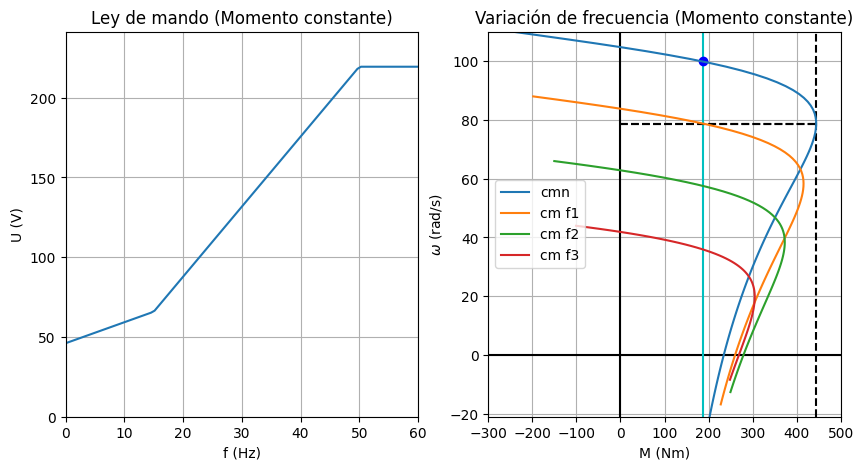

In [11]:
import matplotlib.pyplot as pyl

# Crear una figura rectangular
pyl.figure(figsize=(10,5))

# Ley de mando
pyl.subplot(1, 2, 1)

kboost = 0.3
fboost = kboost*fn
Uboost = kboost*Un
Ustart = 0.7*Uboost

k = Un/fn # pendiente

f = np.linspace(0, 1.2*fn, 100)
U = k*f

U[f > fn] = Un
U[f < fboost] = Ustart + (Uboost - Ustart)/fboost*f[f < fboost] 

pyl.plot(f, U)

# Detalles del gráfico
pyl.title("Ley de mando (Momento constante)")
pyl.ylim(((0, 1.1*Un)))
pyl.xlim((0, max(f)))
pyl.grid()
pyl.xlabel("f (Hz)")
pyl.ylabel("U (V)")


# Característica mecánica
pyl.subplot(1, 2, 2)
# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# Punto de operación nominal
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))
pyl.plot(Mn*np.ones(100), y, 'c', xc, wc*np.ones(100), 'k--')
pyl.plot(Mn, wn, 'bo')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mf1, w1, label="cm f1")
pyl.plot(Mf2, w2, label="cm f2")
pyl.plot(Mf3, w3, label="cm f3")

# Detalles del gráfico
pyl.title("Variación de frecuencia (Momento constante)")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por la capacidad del ventilador del motor de disipar el calor en bajas velocidades. Dmáx= 10:1.

**Gradualidad** suave.

**Estabilidad** buena.

**Factibilidad Económica** Inversión inicial relativaente alta pero eficiencia alta pues trabaja cerca de su velocidad sincróninca.

**Carga permisible** Carga tipo momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

### Carga tipo ventilador

Para el caso de la **carga tipo ventilador** tenemos que $M=k\omega^2$ donde $\omega \sim f$ y evaluando en la **Ley de Kostenko**:

$${U_f' \over U_f}={f' \over f}{\sqrt{f'^2} \over \sqrt{f^2}}$$

Quedando:

$${U_f' \over U_f}={f'^2 \over f^2}$$

Para trazar las características mecánicas usaremos los mismos valores de frecuencia anteriores. Debemos recalcular la amplitud de la tensión y el momento crítico para cada frecuencia.

In [12]:
U1 = Un*(f1/fn)**2
U2 = Un*(f2/fn)**2
U3 = Un*(f3/fn)**2

Mc1 = 3*U1**2/(2*w01*(R1+(R1**2+(X1f1+X2rf1)**2)**0.5))
Mc2 = 3*U2**2/(2*w02*(R1+(R1**2+(X1f2+X2rf2)**2)**0.5))
Mc3 = 3*U3**2/(2*w03*(R1+(R1**2+(X1f3+X2rf3)**2)**0.5))

Mostremos los resultados

In [13]:
import tabulate
data = [
    [fn,F"{w0:.0f}",F"{Un:.0f}",F"{X1:.02f}",F"{X2r:.02f}",F"{Mc:.0f}"],
    [f1,F"{w01:.0f}",F"{U1:.0f}",F"{X1f1:.02f}",F"{X2rf1:.02f}",F"{Mc1:.0f}"],
    [f2,F"{w02:.0f}",F"{U2:.0f}",F"{X1f2:.02f}",F"{X2rf2:.02f}",F"{Mc2:.0f}"],
    [f3,F"{w03:.0f}",F"{U3:.0f}",F"{X1f3:.02f}",F"{X2rf3:.02f}",F"{Mc3:.0f}"],
]
table = tabulate.tabulate(data, 
                          headers=["f (Hz)", "w0 (rad/s)", "Uf (V)", "X1 (ohm)", "X2r (ohm)", "Mc (Nm)"],
                          tablefmt='html')
table

f (Hz),w0 (rad/s),Uf (V),X1 (ohm),X2r (ohm),Mc (Nm)
50,105,219,0.41,0.77,445
40,84,140,0.33,0.61,266
30,63,79,0.25,0.46,134
20,42,35,0.16,0.31,49


Evaluamos un vector de momentos para los 4 valores de frecuencia.

In [14]:
s = np.linspace(-0.05, 1.2, 100)
M = (3*Un**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
Mf1 = (3*U1**2*R2r)/(w01*s*((R1+R2r/s)**2+(X1f1+X2rf1)**2))
Mf2 = (3*U2**2*R2r)/(w02*s*((R1+R2r/s)**2+(X1f2+X2rf2)**2))
Mf3 = (3*U3**2*R2r)/(w03*s*((R1+R2r/s)**2+(X1f3+X2rf3)**2))
w = (1-s)*w0
w1 = (1-s)*w01
w2 = (1-s)*w02
w3 = (1-s)*w03

Ahora trazamos la ley de mando y las características mecánicas

Text(0, 0.5, '$\\omega$ (rad/s)')

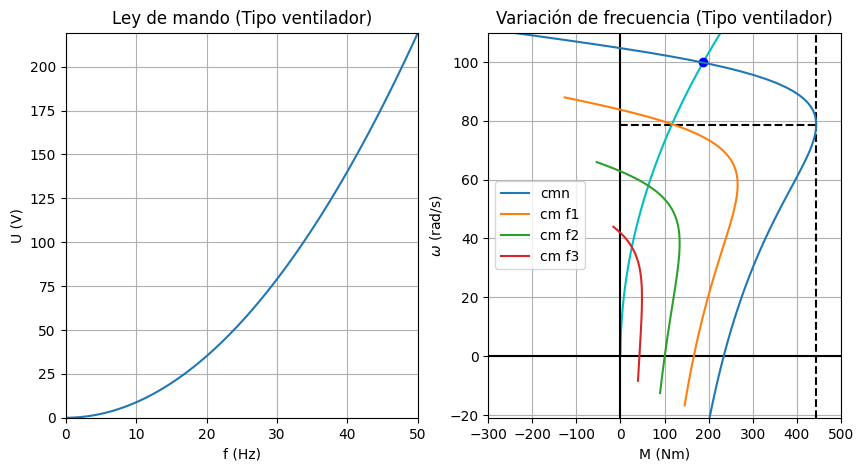

In [15]:
import matplotlib.pyplot as pyl

# Crear una figura rectangular
pyl.figure(figsize=(10,5))

# Ley de mando
pyl.subplot(1, 2, 1)

k = Un/fn**2 # Coeficiente

f = np.linspace(0, fn, 100)
U = k*f**2

pyl.plot(f, U)

# Detalles del gráfico
pyl.title("Ley de mando (Tipo ventilador)")
pyl.ylim(((0, Un)))
pyl.xlim((0, max(f)))
pyl.grid()
pyl.xlabel("f (Hz)")
pyl.ylabel("U (V)")


# Característica mecánica
pyl.subplot(1, 2, 2)

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# --- Punto de operación nominal ---
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))

# Característica mecánica de la carga
wcarga = w[w>=0]
Mcarga = Mn/wn**2*wcarga**2
pyl.plot(Mcarga, wcarga, 'c')

pyl.plot(Mn, wn, 'bo')
# -----------------------------------

# Ejes
y = np.linspace(min(w),max(w),100)
x = np.linspace(-300,500,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mf1, w1, label="cm f1")
pyl.plot(Mf2, w2, label="cm f2")
pyl.plot(Mf3, w3, label="cm f3")

# Detalles del gráfico
pyl.title("Variación de frecuencia (Tipo ventilador)")
pyl.ylim(((min(w),max(w))))
pyl.xlim((-300, 500))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por la capacidad del ventilador del motor de disipar el calor en bajas velocidades. Dmáx= 10:1.

**Gradualidad** suave.

**Estabilidad** buena.

**Factibilidad Económica** Inversión inicial relativaente alta pero eficiencia alta pues trabaja cerca de su velocidad sincróninca.

**Carga permisible** Carga tipo ventilador.

**Dirección del control** Por debajo de las velocidades básicas.

### Carga tipo potencia constante

Para el caso de la **carga tipo potencia constante** tenemos que $M={k \over \omega}$ donde $\omega \sim f$ y evaluando en la **Ley de Kostenko**:

$${U_f' \over U_f}={f' \over f}{\sqrt{1/f'} \over \sqrt{1/f}}$$

Quedando:

$${U_f' \over U_f}={\sqrt{f'} \over \sqrt{f}}$$

Con este tipo de carga puede trabajarse por encima de la frecuencia nominal, manteniendo constante la tensión en su valor nominal y por lo tanto debilitando el flujo.

Para trazar las características mecánicas usaremos dos de las frecuencias anteriores y añadimos una frecuencia por encima de la nominal. 

In [16]:
f1 = 40 # Hz
f2 = 30 # Hz
f3 = 60 # Hz

Aplicamos la ley de mando para calcular la amplitud de la tensión 
y calculamos los valores de la velocidad sincrónica, las reactancias
y el momento crítico para cada frecuencia.

In [17]:
U1 = Un*(f1/fn)**0.5
U2 = Un*(f2/fn)**0.5
U3 = Un # Tensión nominal es el límite superior

w01 = f1*w0/fn
w02 = f2*w0/fn
w03 = f3*w0/fn

X1f1 = f1*X1/fn
X1f2 = f2*X1/fn
X1f3 = f3*X1/fn

X2rf1 = f1*X2r/fn
X2rf2 = f2*X2r/fn
X2rf3 = f3*X2r/fn

Mc1 = 3*U1**2/(2*w01*(R1+(R1**2+(X1f1+X2rf1)**2)**0.5))
Mc2 = 3*U2**2/(2*w02*(R1+(R1**2+(X1f2+X2rf2)**2)**0.5))
Mc3 = 3*U3**2/(2*w03*(R1+(R1**2+(X1f3+X2rf3)**2)**0.5))


Mostremos los resultados

In [18]:
import tabulate
data = [
    [f3,F"{w03:.0f}",F"{U3:.0f}",F"{X1f3:.02f}",F"{X2rf3:.02f}",F"{Mc3:.0f}"],
    [fn,F"{w0:.0f}",F"{Un:.0f}",F"{X1:.02f}",F"{X2r:.02f}",F"{Mc:.0f}"],
    [f1,F"{w01:.0f}",F"{U1:.0f}",F"{X1f1:.02f}",F"{X2rf1:.02f}",F"{Mc1:.0f}"],
    [f2,F"{w02:.0f}",F"{U2:.0f}",F"{X1f2:.02f}",F"{X2rf2:.02f}",F"{Mc2:.0f}"],
]
table = tabulate.tabulate(data, 
                          headers=["f (Hz)", "w0 (rad/s)", "Uf (V)", "X1 (ohm)", "X2r (ohm)", "Mc (Nm)"],
                          tablefmt='html')
table

f (Hz),w0 (rad/s),Uf (V),X1 (ohm),X2r (ohm),Mc (Nm)
60,126,219,0.49,0.92,323
50,105,219,0.41,0.77,445
40,84,196,0.33,0.61,520
30,63,170,0.25,0.46,622


Evaluamos un vector de momentos para los 4 valores de frecuencia.

In [19]:
s = np.linspace(-0.05, 1.2, 100)
M = (3*Un**2*R2r)/(w0*s*((R1+R2r/s)**2+(X1+X2r)**2))
Mf1 = (3*U1**2*R2r)/(w01*s*((R1+R2r/s)**2+(X1f1+X2rf1)**2))
Mf2 = (3*U2**2*R2r)/(w02*s*((R1+R2r/s)**2+(X1f2+X2rf2)**2))
Mf3 = (3*U3**2*R2r)/(w03*s*((R1+R2r/s)**2+(X1f3+X2rf3)**2))
w = (1-s)*w0
w1 = (1-s)*w01
w2 = (1-s)*w02
w3 = (1-s)*w03

Ahora trazamos la ley de mando y las características mecánicas

Text(0, 0.5, '$\\omega$ (rad/s)')

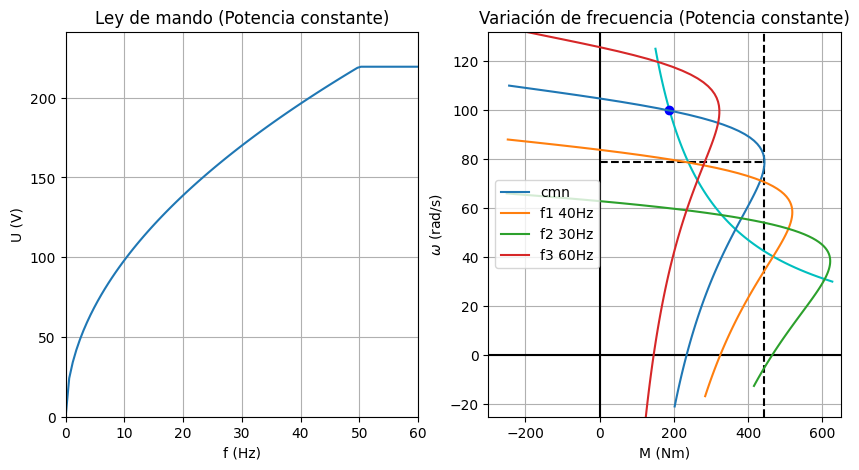

In [21]:
import matplotlib.pyplot as pyl

# Crear una figura rectangular
pyl.figure(figsize=(10,5))

# Ley de mando
pyl.subplot(1, 2, 1)

k = Un/fn**0.5 # Coeficiente

f = np.linspace(0, 1.2*fn, 100)
U = k*f**0.5
U[U>Un] = Un

pyl.plot(f, U)

# Detalles del gráfico
pyl.title("Ley de mando (Potencia constante)")
pyl.ylim(((0, 1.1*Un)))
pyl.xlim((0, max(f)))
pyl.grid()
pyl.xlabel("f (Hz)")
pyl.ylabel("U (V)")


# Característica mecánica
pyl.subplot(1, 2, 2)

# Momento y deslizamiento crítico
wc = w0*(1-Sc)
xc = np.linspace(0, Mc, 100)
y = np.linspace(min(w3),max(w3),100)
pyl.plot(Mc*np.ones(100), y, 'k--', xc, wc*np.ones(100), 'k--')

# --- Punto de operación nominal ---
wn = Nn*np.pi/30
Sn = (w0-wn)/wn
Mn = (3*Un**2*R2r)/(w0*Sn*((R1+R2r/Sn)**2+(X1+X2r)**2))

# Característica mecánica de la carga
wcarga = np.linspace(30, 125, 100)
Mcarga = Mn*wn/wcarga
pyl.plot(Mcarga, wcarga, 'c')

pyl.plot(Mn, wn, 'bo')
# -----------------------------------

# Ejes
x = np.linspace(-300,650,100)
ceros = np.zeros(100)
pyl.plot(ceros, y, 'k', x, ceros, 'k')

# Características mecánicas
pyl.plot(M, w, label="cmn")
pyl.plot(Mf1, w1, label=F"f1 {f1}Hz")
pyl.plot(Mf2, w2, label=F"f2 {f2}Hz")
pyl.plot(Mf3, w3, label=F"f3 {f3}Hz")

# Detalles del gráfico
pyl.title("Variación de frecuencia (Potencia constante)")
pyl.ylim(((min(w3),max(w3))))
pyl.xlim((-300, 650))
pyl.grid()
pyl.legend()
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por la capacidad del ventilador del motor de disipar el calor en bajas velocidades. En este caso puede subir su frecuencia por encima hasta 400Hz (depende de la mecánica del motor la velocidad máxima permisible). Dmáx= 80:1.

**Gradualidad** suave.

**Estabilidad** buena.

**Factibilidad Económica** Inversión inicial relativaente alta pero eficiencia alta pues trabaja cerca de su velocidad sincróninca.

**Carga permisible** Carga tipo potencia constante.

**Dirección del control** Por encima y por debajo de las velocidades básicas.